In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.constraints import max_norm
from keras.datasets import mnist
from keras.utils import to_categorical, np_utils
from keras_applications.densenet import layers
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation


Using TensorFlow backend.


In [2]:
"""Loading in the MNIST dataset"""
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train_WithoutNoise = X_train;
X_test_WithoutNoise = X_test;  #
Y_train_duplicate = Y_train;
Y_test_duplicate = Y_test;  #this is for final evaluations


In [3]:
# add noise to train and test images
noise_factor = 0.25
X_train = X_train + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test = X_test + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train = np.clip(X_train, 0., 1.)
X_test = np.clip(X_test, 0., 1.)


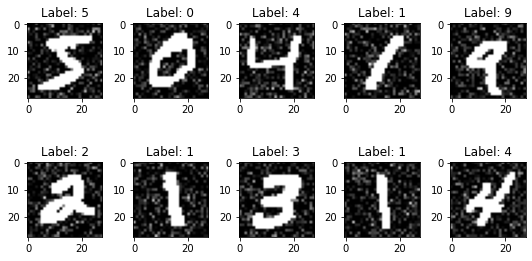

In [4]:
# plot images
num_row = 2
num_col = 5
num = 10
images = X_train[:num]
labels = Y_train[:num]

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()



In [5]:
print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [7]:
print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000, 10)
X_test shape (10000, 28, 28)
y_test shape (10000, 10)


In [8]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255


In [9]:
# building the input vector from the 28x28 pixels
X_train_WithoutNoise = X_train_WithoutNoise.reshape(60000, 784)
X_test_WithoutNoise = X_test_WithoutNoise.reshape(10000, 784)
X_train_WithoutNoise = X_train_WithoutNoise.astype('float32')
X_test_WithoutNoise = X_test_WithoutNoise.astype('float32')

# normalizing the data to help with the training
X_train_WithoutNoise /= 255
X_test_WithoutNoise /= 255


In [10]:
print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)


X_train shape (60000, 784)
y_train shape (60000, 10)
X_test shape (10000, 784)
y_test shape (10000, 10)


In [11]:
# Autoencoder to reduce noise
auto_encoder = Sequential()
auto_encoder.add(Dense(784, input_shape=(784,)))
auto_encoder.add(Activation('relu'))
auto_encoder.add(Dense(784, input_shape=(784,)))
auto_encoder.add(Activation('relu'))
auto_encoder.add(Dense(784, input_shape=(784,)))
auto_encoder.add(Activation('softmax'))

auto_encoder.summary()

# compile autoencoder
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

auto_encoder.fit(X_train, X_train_WithoutNoise, epochs=3)

denoised_train_images = auto_encoder.predict(X_train)
denoised_test_images = auto_encoder.predict(X_test)


X_train = denoised_train_images
X_test = denoised_test_images


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_3 (Activation)    (None, 784)               0         
Total params: 1,846,320
Trainable params: 1,846,320
Non-trainable params: 0
____________________________________________

In [12]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [13]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2)



Epoch 1/20
 - 7s - loss: 0.6532 - accuracy: 0.8047
Epoch 2/20
 - 7s - loss: 0.3027 - accuracy: 0.9103
Epoch 3/20
 - 7s - loss: 0.2356 - accuracy: 0.9281
Epoch 4/20
 - 7s - loss: 0.1949 - accuracy: 0.9409
Epoch 5/20
 - 7s - loss: 0.1675 - accuracy: 0.9496
Epoch 6/20
 - 7s - loss: 0.1524 - accuracy: 0.9533
Epoch 7/20
 - 7s - loss: 0.1380 - accuracy: 0.9574
Epoch 8/20
 - 7s - loss: 0.1262 - accuracy: 0.9609
Epoch 9/20
 - 8s - loss: 0.1179 - accuracy: 0.9634
Epoch 10/20
 - 8s - loss: 0.1098 - accuracy: 0.9661
Epoch 11/20
 - 7s - loss: 0.1040 - accuracy: 0.9680
Epoch 12/20
 - 7s - loss: 0.0973 - accuracy: 0.9688
Epoch 13/20
 - 7s - loss: 0.0918 - accuracy: 0.9709
Epoch 14/20
 - 7s - loss: 0.0865 - accuracy: 0.9725
Epoch 15/20
 - 7s - loss: 0.0828 - accuracy: 0.9734
Epoch 16/20
 - 7s - loss: 0.0798 - accuracy: 0.9739
Epoch 17/20
 - 7s - loss: 0.0772 - accuracy: 0.9755
Epoch 18/20
 - 7s - loss: 0.0717 - accuracy: 0.9770
Epoch 19/20
 - 7s - loss: 0.0687 - accuracy: 0.9776
Epoch 20/20
 - 7s - l

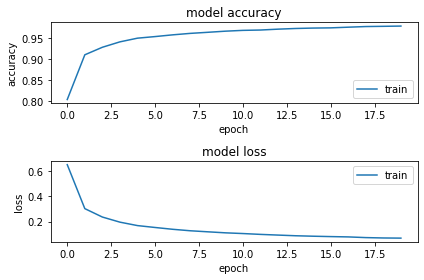

In [14]:
# plotting the accuracy
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')

# plotting the loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

plt.tight_layout()


In [15]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.09570949639827013
Test Accuracy 0.9703999757766724



9704  classified correctly
296  classified incorrectly


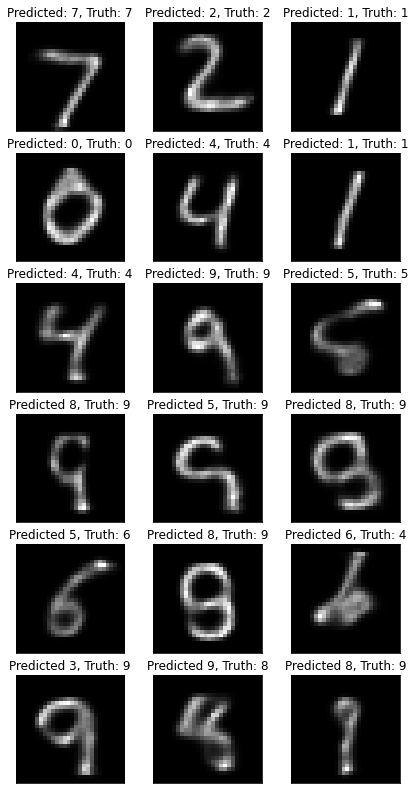

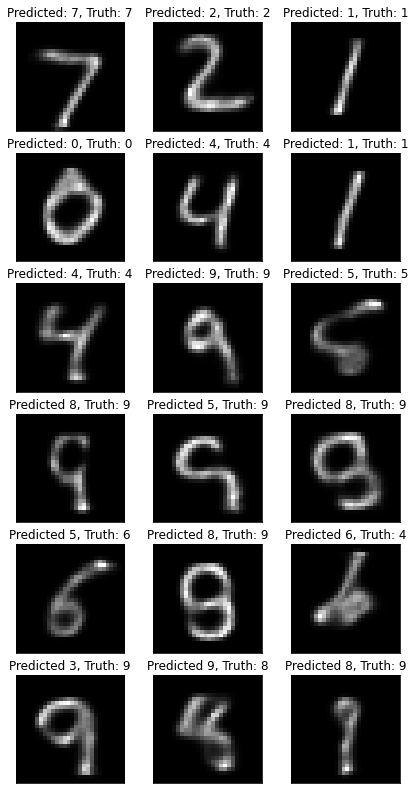

In [16]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test_duplicate)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test_duplicate)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test_duplicate[correct]))
    plt.xticks([])
    plt.yticks([])


# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect],
                                       Y_test_duplicate[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation
